In [13]:
import pandas as pd
df = pd.read_csv('house_price_data.csv')
df
dataset = df.values
dataset
X = dataset[:,0:10]
Y = dataset[:,10]

In [14]:
#Data pre-processing
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [15]:
from sklearn.model_selection import train_test_split
#Data splitting
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [16]:
from tensorflow.keras.layers import Dropout

In [17]:
from tensorflow.keras import regularizers

In [18]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
model_3 = Sequential([
Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
Dropout(0.3),
Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
Dropout(0.3),
Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
Dropout(0.3),
Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
Dropout(0.3),
Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [19]:
model_3.compile(optimizer='adam',
loss='binary_crossentropy',
metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
batch_size=32, epochs=1000,
validation_data=(X_val, Y_val))

Epoch 1/1000
32/32 [==============================] - 1s 24ms/step - loss: 14.2286 - accuracy: 0.6380 - val_loss: 3.8899 - val_accuracy: 0.8539
Epoch 2/1000
32/32 [==============================] - 1s 21ms/step - loss: 1.6744 - accuracy: 0.8239 - val_loss: 0.5881 - val_accuracy: 0.8904
Epoch 3/1000
32/32 [==============================] - 1s 21ms/step - loss: 0.5564 - accuracy: 0.8620 - val_loss: 0.4585 - val_accuracy: 0.8950
Epoch 4/1000
32/32 [==============================] - 1s 22ms/step - loss: 0.5216 - accuracy: 0.8581 - val_loss: 0.4936 - val_accuracy: 0.8721
Epoch 5/1000
32/32 [==============================] - 1s 21ms/step - loss: 0.4919 - accuracy: 0.8767 - val_loss: 0.5641 - val_accuracy: 0.7945
Epoch 6/1000
32/32 [==============================] - 1s 21ms/step - loss: 0.4966 - accuracy: 0.8718 - val_loss: 0.4479 - val_accuracy: 0.8858
Epoch 7/1000
32/32 [==============================] - 1s 21ms/step - loss: 0.4723 - accuracy: 0.8757 - val_loss: 0.4213 - val_accuracy: 0.890

Epoch 58/1000
32/32 [==============================] - 1s 18ms/step - loss: 0.4419 - accuracy: 0.8836 - val_loss: 0.4057 - val_accuracy: 0.8858
Epoch 59/1000
32/32 [==============================] - 1s 18ms/step - loss: 0.4278 - accuracy: 0.8875 - val_loss: 0.4030 - val_accuracy: 0.8904
Epoch 60/1000
32/32 [==============================] - 1s 18ms/step - loss: 0.4284 - accuracy: 0.8924 - val_loss: 0.4126 - val_accuracy: 0.8858
Epoch 61/1000
32/32 [==============================] - 1s 20ms/step - loss: 0.4397 - accuracy: 0.8787 - val_loss: 0.4048 - val_accuracy: 0.8950
Epoch 62/1000
32/32 [==============================] - 1s 20ms/step - loss: 0.4406 - accuracy: 0.8777 - val_loss: 0.4086 - val_accuracy: 0.8858
Epoch 63/1000
32/32 [==============================] - 1s 20ms/step - loss: 0.4369 - accuracy: 0.8806 - val_loss: 0.4068 - val_accuracy: 0.8813
Epoch 64/1000
32/32 [==============================] - 1s 19ms/step - loss: 0.4437 - accuracy: 0.8845 - val_loss: 0.4106 - val_accuracy:

Epoch 115/1000
32/32 [==============================] - 1s 19ms/step - loss: 0.4265 - accuracy: 0.8855 - val_loss: 0.4293 - val_accuracy: 0.8813
Epoch 116/1000
32/32 [==============================] - 1s 19ms/step - loss: 0.4380 - accuracy: 0.8796 - val_loss: 0.4041 - val_accuracy: 0.8813
Epoch 117/1000
32/32 [==============================] - 1s 19ms/step - loss: 0.4326 - accuracy: 0.8914 - val_loss: 0.4085 - val_accuracy: 0.8904
Epoch 118/1000
32/32 [==============================] - 1s 22ms/step - loss: 0.4283 - accuracy: 0.8943 - val_loss: 0.4020 - val_accuracy: 0.8858
Epoch 119/1000
32/32 [==============================] - 1s 18ms/step - loss: 0.4392 - accuracy: 0.8845 - val_loss: 0.4152 - val_accuracy: 0.8858
Epoch 120/1000
32/32 [==============================] - 1s 21ms/step - loss: 0.4400 - accuracy: 0.8855 - val_loss: 0.4557 - val_accuracy: 0.8584
Epoch 121/1000
32/32 [==============================] - 1s 19ms/step - loss: 0.4509 - accuracy: 0.8718 - val_loss: 0.4085 - val_ac

32/32 [==============================] - 1s 18ms/step - loss: 0.4289 - accuracy: 0.8924 - val_loss: 0.4387 - val_accuracy: 0.8721
Epoch 172/1000
32/32 [==============================] - 1s 22ms/step - loss: 0.4222 - accuracy: 0.8914 - val_loss: 0.4104 - val_accuracy: 0.8858
Epoch 173/1000
32/32 [==============================] - 1s 23ms/step - loss: 0.4548 - accuracy: 0.8630 - val_loss: 0.4302 - val_accuracy: 0.8767
Epoch 174/1000
32/32 [==============================] - 1s 23ms/step - loss: 0.4441 - accuracy: 0.8728 - val_loss: 0.5048 - val_accuracy: 0.8265
Epoch 175/1000
32/32 [==============================] - 1s 22ms/step - loss: 0.4495 - accuracy: 0.8787 - val_loss: 0.4127 - val_accuracy: 0.8858
Epoch 176/1000
32/32 [==============================] - 1s 22ms/step - loss: 0.4257 - accuracy: 0.8933 - val_loss: 0.4318 - val_accuracy: 0.8721
Epoch 177/1000
32/32 [==============================] - 1s 20ms/step - loss: 0.4331 - accuracy: 0.8845 - val_loss: 0.4135 - val_accuracy: 0.8813


32/32 [==============================] - 1s 21ms/step - loss: 0.4299 - accuracy: 0.8836 - val_loss: 0.4098 - val_accuracy: 0.8767
Epoch 228/1000
32/32 [==============================] - 1s 21ms/step - loss: 0.4395 - accuracy: 0.8826 - val_loss: 0.3995 - val_accuracy: 0.8950
Epoch 229/1000
32/32 [==============================] - 1s 21ms/step - loss: 0.4256 - accuracy: 0.8826 - val_loss: 0.3996 - val_accuracy: 0.8858
Epoch 230/1000
32/32 [==============================] - 1s 19ms/step - loss: 0.4291 - accuracy: 0.8836 - val_loss: 0.4132 - val_accuracy: 0.8858
Epoch 231/1000
32/32 [==============================] - 1s 18ms/step - loss: 0.4244 - accuracy: 0.8826 - val_loss: 0.3986 - val_accuracy: 0.8858
Epoch 232/1000
32/32 [==============================] - 1s 19ms/step - loss: 0.4299 - accuracy: 0.8885 - val_loss: 0.4050 - val_accuracy: 0.8950
Epoch 233/1000
32/32 [==============================] - 1s 22ms/step - loss: 0.4391 - accuracy: 0.8816 - val_loss: 0.4411 - val_accuracy: 0.8676


32/32 [==============================] - 1s 21ms/step - loss: 0.4378 - accuracy: 0.8943 - val_loss: 0.4279 - val_accuracy: 0.8813
Epoch 284/1000
32/32 [==============================] - 1s 19ms/step - loss: 0.4259 - accuracy: 0.8933 - val_loss: 0.3982 - val_accuracy: 0.8950
Epoch 285/1000
32/32 [==============================] - 1s 19ms/step - loss: 0.4281 - accuracy: 0.8914 - val_loss: 0.4331 - val_accuracy: 0.8676
Epoch 286/1000
32/32 [==============================] - 1s 18ms/step - loss: 0.4334 - accuracy: 0.8885 - val_loss: 0.4021 - val_accuracy: 0.8813
Epoch 287/1000
32/32 [==============================] - 1s 18ms/step - loss: 0.4457 - accuracy: 0.8845 - val_loss: 0.4455 - val_accuracy: 0.8676
Epoch 288/1000
32/32 [==============================] - 1s 18ms/step - loss: 0.4338 - accuracy: 0.8845 - val_loss: 0.4069 - val_accuracy: 0.8904
Epoch 289/1000
32/32 [==============================] - 1s 18ms/step - loss: 0.4288 - accuracy: 0.8796 - val_loss: 0.3995 - val_accuracy: 0.8858


32/32 [==============================] - 1s 18ms/step - loss: 0.4279 - accuracy: 0.8748 - val_loss: 0.4672 - val_accuracy: 0.8539
Epoch 340/1000
32/32 [==============================] - 1s 18ms/step - loss: 0.4363 - accuracy: 0.8865 - val_loss: 0.3998 - val_accuracy: 0.8950
Epoch 341/1000
32/32 [==============================] - 1s 18ms/step - loss: 0.4059 - accuracy: 0.8963 - val_loss: 0.3979 - val_accuracy: 0.8813
Epoch 342/1000
32/32 [==============================] - 1s 18ms/step - loss: 0.4253 - accuracy: 0.8845 - val_loss: 0.4189 - val_accuracy: 0.8858
Epoch 343/1000
32/32 [==============================] - 1s 18ms/step - loss: 0.4242 - accuracy: 0.8943 - val_loss: 0.4016 - val_accuracy: 0.8858
Epoch 344/1000
32/32 [==============================] - 1s 18ms/step - loss: 0.4318 - accuracy: 0.8826 - val_loss: 0.4019 - val_accuracy: 0.8904
Epoch 345/1000
32/32 [==============================] - 1s 18ms/step - loss: 0.4310 - accuracy: 0.8748 - val_loss: 0.4024 - val_accuracy: 0.8767


32/32 [==============================] - 1s 19ms/step - loss: 0.4304 - accuracy: 0.8885 - val_loss: 0.4217 - val_accuracy: 0.8813
Epoch 396/1000
32/32 [==============================] - 1s 20ms/step - loss: 0.4284 - accuracy: 0.8914 - val_loss: 0.4035 - val_accuracy: 0.8858
Epoch 397/1000
32/32 [==============================] - 1s 19ms/step - loss: 0.4128 - accuracy: 0.8924 - val_loss: 0.4267 - val_accuracy: 0.8767
Epoch 398/1000
32/32 [==============================] - 1s 19ms/step - loss: 0.4218 - accuracy: 0.8894 - val_loss: 0.4575 - val_accuracy: 0.8402
Epoch 399/1000
32/32 [==============================] - 1s 20ms/step - loss: 0.4306 - accuracy: 0.8796 - val_loss: 0.4229 - val_accuracy: 0.8858
Epoch 400/1000
32/32 [==============================] - 1s 19ms/step - loss: 0.4327 - accuracy: 0.8865 - val_loss: 0.4161 - val_accuracy: 0.8904
Epoch 401/1000
32/32 [==============================] - 1s 19ms/step - loss: 0.4164 - accuracy: 0.8982 - val_loss: 0.4094 - val_accuracy: 0.8904


32/32 [==============================] - 1s 18ms/step - loss: 0.4279 - accuracy: 0.8963 - val_loss: 0.3932 - val_accuracy: 0.8858
Epoch 452/1000
32/32 [==============================] - 1s 18ms/step - loss: 0.4312 - accuracy: 0.8767 - val_loss: 0.4069 - val_accuracy: 0.8904
Epoch 453/1000
32/32 [==============================] - 1s 18ms/step - loss: 0.4155 - accuracy: 0.8904 - val_loss: 0.4453 - val_accuracy: 0.8539
Epoch 454/1000
32/32 [==============================] - 1s 18ms/step - loss: 0.4251 - accuracy: 0.8914 - val_loss: 0.3929 - val_accuracy: 0.8904
Epoch 455/1000
32/32 [==============================] - 1s 18ms/step - loss: 0.4240 - accuracy: 0.8894 - val_loss: 0.3967 - val_accuracy: 0.8858
Epoch 456/1000
32/32 [==============================] - 1s 19ms/step - loss: 0.4458 - accuracy: 0.8806 - val_loss: 0.3998 - val_accuracy: 0.8858
Epoch 457/1000
32/32 [==============================] - 1s 18ms/step - loss: 0.4195 - accuracy: 0.8904 - val_loss: 0.4254 - val_accuracy: 0.8767


32/32 [==============================] - 1s 19ms/step - loss: 0.4306 - accuracy: 0.8845 - val_loss: 0.3998 - val_accuracy: 0.8858
Epoch 508/1000
32/32 [==============================] - 1s 19ms/step - loss: 0.4282 - accuracy: 0.8836 - val_loss: 0.4293 - val_accuracy: 0.8767
Epoch 509/1000
32/32 [==============================] - 1s 20ms/step - loss: 0.4166 - accuracy: 0.8992 - val_loss: 0.4012 - val_accuracy: 0.8950
Epoch 510/1000
32/32 [==============================] - 1s 19ms/step - loss: 0.4222 - accuracy: 0.8943 - val_loss: 0.4706 - val_accuracy: 0.8402
Epoch 511/1000
32/32 [==============================] - 1s 19ms/step - loss: 0.4414 - accuracy: 0.8767 - val_loss: 0.4097 - val_accuracy: 0.8858
Epoch 512/1000
32/32 [==============================] - 1s 19ms/step - loss: 0.4190 - accuracy: 0.8924 - val_loss: 0.4008 - val_accuracy: 0.8858
Epoch 513/1000
32/32 [==============================] - 1s 19ms/step - loss: 0.4333 - accuracy: 0.8806 - val_loss: 0.4194 - val_accuracy: 0.8858


32/32 [==============================] - 1s 19ms/step - loss: 0.4380 - accuracy: 0.8738 - val_loss: 0.4880 - val_accuracy: 0.8356
Epoch 564/1000
32/32 [==============================] - 1s 21ms/step - loss: 0.4307 - accuracy: 0.8796 - val_loss: 0.3940 - val_accuracy: 0.8950
Epoch 565/1000
32/32 [==============================] - 1s 20ms/step - loss: 0.4364 - accuracy: 0.8894 - val_loss: 0.4002 - val_accuracy: 0.8950
Epoch 566/1000
32/32 [==============================] - 1s 21ms/step - loss: 0.4171 - accuracy: 0.8904 - val_loss: 0.3995 - val_accuracy: 0.8904
Epoch 567/1000
32/32 [==============================] - 1s 22ms/step - loss: 0.4271 - accuracy: 0.8953 - val_loss: 0.4409 - val_accuracy: 0.8676
Epoch 568/1000
32/32 [==============================] - 1s 20ms/step - loss: 0.4258 - accuracy: 0.8796 - val_loss: 0.4099 - val_accuracy: 0.8858
Epoch 569/1000
32/32 [==============================] - 1s 18ms/step - loss: 0.4349 - accuracy: 0.8718 - val_loss: 0.4064 - val_accuracy: 0.8904


32/32 [==============================] - 1s 18ms/step - loss: 0.4190 - accuracy: 0.8914 - val_loss: 0.4045 - val_accuracy: 0.8904
Epoch 620/1000
32/32 [==============================] - 1s 24ms/step - loss: 0.4295 - accuracy: 0.8826 - val_loss: 0.4264 - val_accuracy: 0.8767
Epoch 621/1000
32/32 [==============================] - 1s 20ms/step - loss: 0.4159 - accuracy: 0.8855 - val_loss: 0.4550 - val_accuracy: 0.8493
Epoch 622/1000
32/32 [==============================] - 1s 19ms/step - loss: 0.4392 - accuracy: 0.8865 - val_loss: 0.3993 - val_accuracy: 0.8858
Epoch 623/1000
32/32 [==============================] - 1s 19ms/step - loss: 0.4188 - accuracy: 0.8924 - val_loss: 0.3956 - val_accuracy: 0.8813
Epoch 624/1000
32/32 [==============================] - 1s 22ms/step - loss: 0.4208 - accuracy: 0.8894 - val_loss: 0.4024 - val_accuracy: 0.8904
Epoch 625/1000
32/32 [==============================] - 1s 26ms/step - loss: 0.4236 - accuracy: 0.8865 - val_loss: 0.4066 - val_accuracy: 0.8904


32/32 [==============================] - 1s 20ms/step - loss: 0.4222 - accuracy: 0.8973 - val_loss: 0.4269 - val_accuracy: 0.8767
Epoch 676/1000
32/32 [==============================] - 1s 24ms/step - loss: 0.4310 - accuracy: 0.8777 - val_loss: 0.4053 - val_accuracy: 0.8904
Epoch 677/1000
32/32 [==============================] - 1s 20ms/step - loss: 0.4296 - accuracy: 0.8875 - val_loss: 0.3976 - val_accuracy: 0.8950
Epoch 678/1000
32/32 [==============================] - 1s 18ms/step - loss: 0.4266 - accuracy: 0.8836 - val_loss: 0.4246 - val_accuracy: 0.8676
Epoch 679/1000
32/32 [==============================] - 1s 19ms/step - loss: 0.4292 - accuracy: 0.8845 - val_loss: 0.3974 - val_accuracy: 0.8858
Epoch 680/1000
32/32 [==============================] - 1s 19ms/step - loss: 0.4306 - accuracy: 0.8787 - val_loss: 0.4030 - val_accuracy: 0.8950
Epoch 681/1000
32/32 [==============================] - 1s 21ms/step - loss: 0.4258 - accuracy: 0.8875 - val_loss: 0.4068 - val_accuracy: 0.8858


32/32 [==============================] - 1s 23ms/step - loss: 0.4406 - accuracy: 0.8806 - val_loss: 0.3989 - val_accuracy: 0.8813
Epoch 732/1000
32/32 [==============================] - 1s 19ms/step - loss: 0.4250 - accuracy: 0.8855 - val_loss: 0.3992 - val_accuracy: 0.8858
Epoch 733/1000
32/32 [==============================] - 1s 18ms/step - loss: 0.4178 - accuracy: 0.8933 - val_loss: 0.3948 - val_accuracy: 0.8858
Epoch 734/1000
32/32 [==============================] - 1s 19ms/step - loss: 0.4270 - accuracy: 0.8855 - val_loss: 0.3945 - val_accuracy: 0.8858
Epoch 735/1000
32/32 [==============================] - 1s 21ms/step - loss: 0.4205 - accuracy: 0.8855 - val_loss: 0.3949 - val_accuracy: 0.8904
Epoch 736/1000
32/32 [==============================] - 1s 22ms/step - loss: 0.4214 - accuracy: 0.8914 - val_loss: 0.4386 - val_accuracy: 0.8630
Epoch 737/1000
32/32 [==============================] - 1s 19ms/step - loss: 0.4196 - accuracy: 0.8904 - val_loss: 0.3975 - val_accuracy: 0.8950


32/32 [==============================] - 1s 19ms/step - loss: 0.4182 - accuracy: 0.8953 - val_loss: 0.4024 - val_accuracy: 0.8767
Epoch 788/1000
32/32 [==============================] - 1s 21ms/step - loss: 0.4279 - accuracy: 0.8816 - val_loss: 0.4098 - val_accuracy: 0.8858
Epoch 789/1000
32/32 [==============================] - 1s 20ms/step - loss: 0.4280 - accuracy: 0.8845 - val_loss: 0.4096 - val_accuracy: 0.8904
Epoch 790/1000
32/32 [==============================] - 1s 20ms/step - loss: 0.4276 - accuracy: 0.8787 - val_loss: 0.4081 - val_accuracy: 0.8858
Epoch 791/1000
32/32 [==============================] - 1s 20ms/step - loss: 0.4272 - accuracy: 0.8865 - val_loss: 0.4111 - val_accuracy: 0.8858
Epoch 792/1000
32/32 [==============================] - 1s 20ms/step - loss: 0.4191 - accuracy: 0.8855 - val_loss: 0.4018 - val_accuracy: 0.8904
Epoch 793/1000
32/32 [==============================] - 1s 21ms/step - loss: 0.4249 - accuracy: 0.8904 - val_loss: 0.3974 - val_accuracy: 0.8813


32/32 [==============================] - 1s 21ms/step - loss: 0.4216 - accuracy: 0.8924 - val_loss: 0.4040 - val_accuracy: 0.8904
Epoch 844/1000
32/32 [==============================] - 1s 23ms/step - loss: 0.4238 - accuracy: 0.8904 - val_loss: 0.4180 - val_accuracy: 0.8858
Epoch 845/1000
32/32 [==============================] - 1s 21ms/step - loss: 0.4227 - accuracy: 0.8894 - val_loss: 0.3949 - val_accuracy: 0.8813
Epoch 846/1000
32/32 [==============================] - 1s 23ms/step - loss: 0.4249 - accuracy: 0.8894 - val_loss: 0.3957 - val_accuracy: 0.8858
Epoch 847/1000
32/32 [==============================] - 1s 20ms/step - loss: 0.4249 - accuracy: 0.8933 - val_loss: 0.4021 - val_accuracy: 0.8858
Epoch 848/1000
32/32 [==============================] - 1s 19ms/step - loss: 0.4096 - accuracy: 0.8973 - val_loss: 0.4479 - val_accuracy: 0.8584
Epoch 849/1000
32/32 [==============================] - 1s 18ms/step - loss: 0.4225 - accuracy: 0.8845 - val_loss: 0.4119 - val_accuracy: 0.8858


32/32 [==============================] - 1s 19ms/step - loss: 0.4315 - accuracy: 0.8767 - val_loss: 0.4198 - val_accuracy: 0.8858
Epoch 900/1000
32/32 [==============================] - 1s 19ms/step - loss: 0.4141 - accuracy: 0.8933 - val_loss: 0.4121 - val_accuracy: 0.8858
Epoch 901/1000
32/32 [==============================] - 1s 19ms/step - loss: 0.4192 - accuracy: 0.8904 - val_loss: 0.3951 - val_accuracy: 0.8904
Epoch 902/1000
32/32 [==============================] - 1s 19ms/step - loss: 0.4219 - accuracy: 0.8933 - val_loss: 0.4113 - val_accuracy: 0.8858
Epoch 903/1000
32/32 [==============================] - 1s 26ms/step - loss: 0.4230 - accuracy: 0.8894 - val_loss: 0.4042 - val_accuracy: 0.8904
Epoch 904/1000
32/32 [==============================] - 1s 24ms/step - loss: 0.4152 - accuracy: 0.9002 - val_loss: 0.4340 - val_accuracy: 0.8676
Epoch 905/1000
32/32 [==============================] - 1s 23ms/step - loss: 0.4256 - accuracy: 0.8914 - val_loss: 0.4159 - val_accuracy: 0.8858


32/32 [==============================] - 1s 19ms/step - loss: 0.4339 - accuracy: 0.8855 - val_loss: 0.4411 - val_accuracy: 0.8721
Epoch 956/1000
32/32 [==============================] - 1s 19ms/step - loss: 0.4326 - accuracy: 0.8904 - val_loss: 0.4071 - val_accuracy: 0.8904
Epoch 957/1000
32/32 [==============================] - 1s 19ms/step - loss: 0.4213 - accuracy: 0.8875 - val_loss: 0.4249 - val_accuracy: 0.8767
Epoch 958/1000
32/32 [==============================] - 1s 19ms/step - loss: 0.4208 - accuracy: 0.8904 - val_loss: 0.3967 - val_accuracy: 0.8950
Epoch 959/1000
32/32 [==============================] - 1s 19ms/step - loss: 0.4362 - accuracy: 0.8826 - val_loss: 0.3990 - val_accuracy: 0.8904
Epoch 960/1000
32/32 [==============================] - 1s 18ms/step - loss: 0.4147 - accuracy: 0.8963 - val_loss: 0.4036 - val_accuracy: 0.8858
Epoch 961/1000
32/32 [==============================] - 1s 18ms/step - loss: 0.4266 - accuracy: 0.8855 - val_loss: 0.3926 - val_accuracy: 0.8858


In [20]:
model_3.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.4422 - accuracy: 0.8676


[0.4421992897987366, 0.8675799369812012]

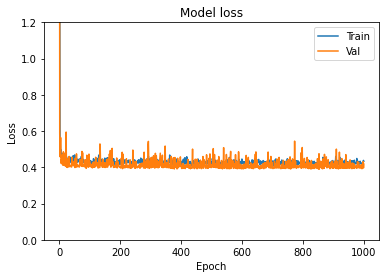

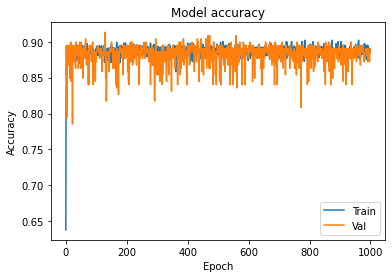

In [22]:
import matplotlib.pyplot as plt
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()
plt.plot(hist_3.history['accuracy'])
15
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()